In [1]:
import pyaudio
import speech_recognition as sr

In [2]:
r = sr.Recognizer()
with sr.Microphone() as source:
    print("je vous écoute")
    audio = r.listen(source)
try:
    text = r.recognize_google(audio)  #, language = "fr_FR")
    print(f"vous avez bien dit :{text}")
except sr.UnknownValueError :
        print("je ne comprends rien")
except sr.RequestError as e:
        print(f"Google speech API hors service {e}")
        
    

je vous écoute
Google speech API hors service recognition connection failed: [Errno 11001] getaddrinfo failed


In [3]:
#visualisation de données dans une carte, librairie folium
import folium


In [4]:
m = folium.Map(location = [14.7645042, -17.3660286])
m 

In [6]:
folium.Marker(
              location = [14.7645042, -17.3660286],
              popup = 'Centre',
              icon = folium.Icon(color = 'red', icon = 'onfo-sign')
).add_to(m)
m

In [7]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [5]:
import geocoder

In [6]:
g1 = geocoder.osm('Keur Massar, DAKAR, SENEGAL')
A = g1.latlng
g2 = geocoder.osm('Pikine, DAKAR, SENEGAL')
B = g2.latlng
g3 = geocoder.osm('Plateau, DAKAR, SENEGAL')
C = g3.latlng
print(A,B,C)

Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Keur+Massar%2C+DAKAR%2C+SENEGAL&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002791479EAC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Pikine%2C+DAKAR%2C+SENEGAL&format=jsonv2&addressdetails=1&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000279147B7130>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max r

None None None


In [7]:
folium.Marker(
              location = A,
              popup = 'Poste 1 Transfo 630 kVA',
              icon = folium.Icon(color = 'red', icon = 'onfo-sign')
).add_to(m)

folium.Marker(
              location = B,
              popup = 'Poste 2 Transfo 630 kVA',
              icon = folium.Icon(color = 'red', icon = 'onfo-sign')
).add_to(m)

folium.CircleMarker(
              location = C,
              radius = 5,
              popup = 'Poste 3 Transfo 400 kVA',
              color = 'blue',
              fill_color = 'blue'
).add_to(m)
m

ValueError: Marker location must be assigned when added directly to map.

In [10]:
#Analyse des séries temporelles pour réaliser des prédiction
import pandas as pd
path = r"C:\Users\dell\Documents\Perso\fichiers_d_exercice_python_serie\batch_02\stationnarite\donnees_ventes.xlsx"
vente = pd.read_excel(path)
vente.head()


,Date,Ventes
0,2018-01-01,283.0
1,2018-02-01,161.9
2,2018-03-01,195.1
3,2018-04-01,131.3
4,2018-05-01,191.3


In [11]:
vente.set_index('Date', inplace = True)
vente.head()

,Ventes
Date,
2018-01-01,283.0
2018-02-01,161.9
2018-03-01,195.1
2018-04-01,131.3
2018-05-01,191.3


Text(0.5, 0, 'Date')

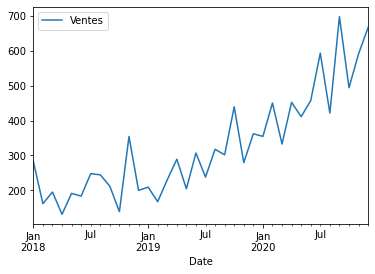

In [12]:
import matplotlib.pyplot as plt
vente.plot()
plt.xlabel('Date')

In [16]:
#Tendance évolutive --->série temporelle non stationnaire: 
Div = round(len(vente)/2)
V1, V2 = vente[0:Div], vente[Div:]
m_1, m_2 = V1.mean(), V2.mean()
var1, var2 = V1.var(), V2.var()
print(f'moyenne 1 = %f, moyenne 2 = %f'%(m_1, m_2))
print(f'variance 1 = %f, variance 2 = %f'%(var1, var2))


moyenne 1 = 219.505556, moyenne 2 = 436.861111
variance 1 = 3534.308791, variance 2 = 17317.571928


In [17]:
from statsmodels.tsa.stattools import adfuller
resultat = adfuller(vente["Ventes"])
print('Test de Dickey-Fuller: %.2f'%resultat[0])
print('p-value :%.2f'%resultat[1])
print('valeur critique:')
for key, value in resultat[4].items():
    print('\t%s: %.3f'%(key, value))

Test de Dickey-Fuller: 3.13
p-value :1.00
valeur critique:
	1%: -3.724
	5%: -2.986
	10%: -2.633


In [19]:
import xml.etree.ElementTree as xml

In [20]:
path = r"C:\Users\dell\Documents\Perso\fichiers_d_exercice_python_serie\BP2015BPAL.xml"
arbre = xml.parse(path)
racine = arbre.getroot()

In [21]:
racine.tag, racine.attrib

('{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}DocumentBudgetaire',
 {'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'http://www.minefi.gouv.fr/cp/demat/docbudgetaire Actes_budgetaires___Schema_Annexes_Bull_V15\\DocumentBudgetaire.xsd'})

In [22]:
for b in racine:
    print (b.tag,b.attrib)

{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}VersionSchema {'V': '69'}
{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}BlocEditeur {}
{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}VersionOutil {'outil': 'DSC_COMMON', 'version': '22'}
{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}VersionOutil {'outil': 'REMAT', 'version': '14_2014'}
{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}Scellement {'md5': '6191713775988d4efa36c3253d55a17f', 'sha1': '747c14c71dfd8cac5dcc036186fdd00028bfe423', 'date': '2014-12-22T15:18:55'}
{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}EnTeteDocBudgetaire {}
{http://www.minefi.gouv.fr/cp/demat/docbudgetaire}Budget {}


In [28]:
import sys
!{sys.executable} -m pip install selenium

In [50]:
#graphviz
from graphviz import Digraph
import pydotplus
from sklearn import tree
import collections

In [51]:
X = [[100, 65, 0],
     [177, 92, 0],
     [136, 85, 1],
     [174, 105, 0],
     [141, 78, 1]]
Y=['C1','C2','C2','C1','C2']
attributs = ['taille', 'poids', 'Mal_dos']

In [52]:
c = tree.DecisionTreeClassifier()
c = c.fit(X,Y)

In [56]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [57]:
# Visualize data
donnees_dot = tree.export_graphviz(c,
                                feature_names=attributs,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(donnees_dot)

couleurs = ('red', 'green')
arcs = collections.defaultdict(list)

for arc in graph.get_edge_list():
    arcs[arc.get_source()].append(int(arc.get_destination()))

for arc in arcs:
    arcs[arc].sort()    
    for i in range(2):
        dest = graph.get_node(str(arcs[arc][i]))[0]
        dest.set_fillcolor(couleurs[i])

In [61]:
graph.write_png('arbre.png')

True

In [62]:
from IPython.display import Image

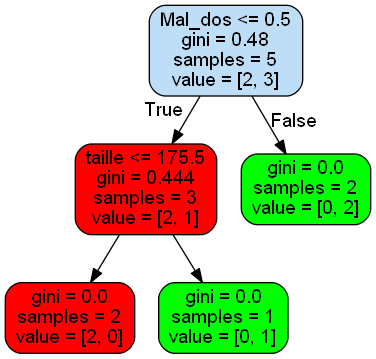

In [63]:
Image("arbre.png")

In [64]:
#vectorisation
import numpy as np
import time

In [65]:
A = 1000    # attributs
I = 5000    #instance d'apprentissage
D=np.random.rand(A,I)    # données A ligne, I colonne
P=np.random.rand(A,1)    # Poids A ligne, 1 colonne

In [66]:
Z1 = np.zeros((1, I))
t1 = time.time()
for i in range(D.shape[1]):
    for j in range(D.shape[0]):
        Z1[0][i] += P[j]*D[j][i]
print("Durée de calcul sans vectorisation : ", (time.time()-t1)*1000, 'ms')

Durée de calcul sans vectorisation :  15669.827938079834 ms


In [69]:
t2 = time.time()
Z2 = np.dot(P.T, D)
print("Durée de calcul avec vectorisation : ", (time.time()-t2)*1000, "ms")


Durée de calcul avec vectorisation :  3.0393600463867188 ms


In [70]:
#valeur propres et vecteurs propres : ACP
import numpy as np
import numpy.linalg as la

In [72]:
Mat = np.matrix([[4,5],[2,3]])
Mat

matrix([[4, 5],
        [2, 3]])

In [73]:
val_p = la.eigvals(Mat)
val_p

array([6.70156212, 0.29843788])

In [75]:
val_p, vec_p =la.eig(Mat)
vec_1, vec_2 = vec_p[:,0], vec_p[:,1]
vec_1, vec_2

(matrix([[0.87979045],
         [0.47536171]]),
 matrix([[-0.80372182],
         [ 0.59500525]]))

In [76]:
vec_2*val_p[1], Mat*vec_2

(matrix([[-0.23986104],
         [ 0.1775721 ]]),
 matrix([[-0.23986104],
         [ 0.1775721 ]]))

In [77]:
np.allclose(np.linalg.det(Mat-val_p[0]*np.eye(2)), 0)

True